# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
   # city_url = f"{url}&q={city}&appid={weather_api_key}"
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    units = "metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kili
Processing Record 2 of Set 1 | nemuro
Processing Record 3 of Set 1 | villa yapacani
Processing Record 4 of Set 1 | broken hill
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | zaragoza
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | raja
Processing Record 11 of Set 1 | akureyri
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | flying fish cove
Processing Record 15 of Set 1 | vilyuysk
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | rizokarpaso
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 21 of Set 1 | rikaze
Processing Record 22 of Set 1 | waita

Processing Record 43 of Set 4 | pochinok
Processing Record 44 of Set 4 | pathein
Processing Record 45 of Set 4 | remire-montjoly
Processing Record 46 of Set 4 | dinguiraye
Processing Record 47 of Set 4 | kenai
Processing Record 48 of Set 4 | ugoofaaru
Processing Record 49 of Set 4 | sandnessjoen
Processing Record 0 of Set 5 | sola
Processing Record 1 of Set 5 | kikwit
Processing Record 2 of Set 5 | amuntai
Processing Record 3 of Set 5 | dudinka
Processing Record 4 of Set 5 | wailua homesteads
Processing Record 5 of Set 5 | nar'yan-mar
Processing Record 6 of Set 5 | morshansk
Processing Record 7 of Set 5 | mata-utu
Processing Record 8 of Set 5 | artova
Processing Record 9 of Set 5 | mcalester
Processing Record 10 of Set 5 | saldanha
Processing Record 11 of Set 5 | klyuchi
Processing Record 12 of Set 5 | salekhard
Processing Record 13 of Set 5 | macheng
Processing Record 14 of Set 5 | colonia
Processing Record 15 of Set 5 | bantogon
Processing Record 16 of Set 5 | lihue
Processing Record

Processing Record 34 of Set 8 | kudat
Processing Record 35 of Set 8 | shaowu
Processing Record 36 of Set 8 | alice springs
Processing Record 37 of Set 8 | ballina
Processing Record 38 of Set 8 | bartica
Processing Record 39 of Set 8 | rio verde
Processing Record 40 of Set 8 | tomohon
Processing Record 41 of Set 8 | karystos
Processing Record 42 of Set 8 | filadelfia
Processing Record 43 of Set 8 | big spring
Processing Record 44 of Set 8 | kayyerkan
Processing Record 45 of Set 8 | bom jesus
Processing Record 46 of Set 8 | barinitas
Processing Record 47 of Set 8 | mount isa
Processing Record 48 of Set 8 | coahuayana de hidalgo
Processing Record 49 of Set 8 | harstad
Processing Record 0 of Set 9 | verkh-chebula
Processing Record 1 of Set 9 | ocean shores
Processing Record 2 of Set 9 | praia da vitoria
Processing Record 3 of Set 9 | changyon
Processing Record 4 of Set 9 | lubang
Processing Record 5 of Set 9 | mount pearl
Processing Record 6 of Set 9 | kachug
Processing Record 7 of Set 9 |

Processing Record 23 of Set 12 | liepaja
Processing Record 24 of Set 12 | borogontsy
Processing Record 25 of Set 12 | bemidji
Processing Record 26 of Set 12 | cabedelo
Processing Record 27 of Set 12 | al bawiti
Processing Record 28 of Set 12 | lata
Processing Record 29 of Set 12 | menomonie
Processing Record 30 of Set 12 | tshabong
-----------------------------
Data Retrieval Complete      
-----------------------------


In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kili,5.6439,169.1211,28.44,74,93,8.64,MH,1704295448
1,nemuro,43.3236,145.5750,-1.99,68,100,2.97,JP,1704295448
2,villa yapacani,-17.4000,-63.8333,29.47,69,100,0.21,BO,1704295448
3,broken hill,-31.9500,141.4333,26.09,49,100,9.15,AU,1704295216
4,iqaluit,63.7506,-68.5145,-19.15,71,75,11.83,CA,1704295232


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kili,5.6439,169.1211,28.44,74,93,8.64,MH,1704295448
1,nemuro,43.3236,145.5750,-1.99,68,100,2.97,JP,1704295448
2,villa yapacani,-17.4000,-63.8333,29.47,69,100,0.21,BO,1704295448
3,broken hill,-31.9500,141.4333,26.09,49,100,9.15,AU,1704295216
4,iqaluit,63.7506,-68.5145,-19.15,71,75,11.83,CA,1704295232


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

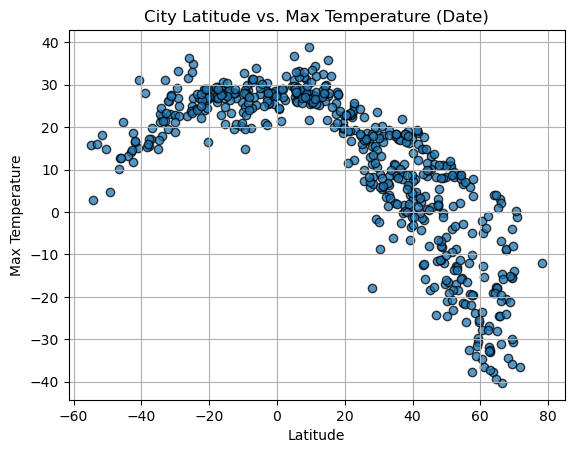

In [52]:
# Build scatter plot for latitude vs. temperature
latitudes = [city["Lat"] for city in city_data]
temperatures = [city["Max Temp"] for city in city_data]

plt.scatter(latitudes, temperatures, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

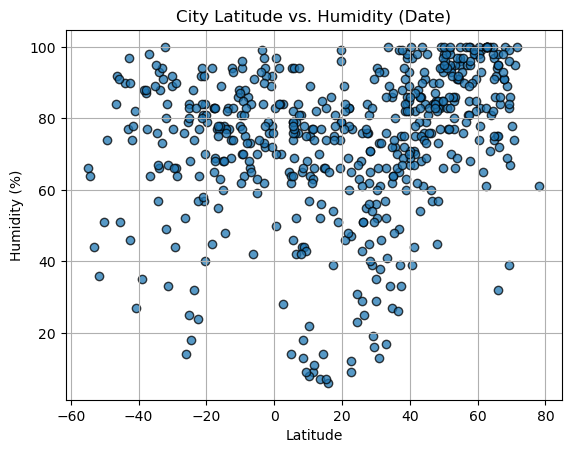

In [53]:
# Build the scatter plots for latitude vs. humidity
humidities = [city["Humidity"] for city in city_data]
plt.scatter(latitudes, humidities, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

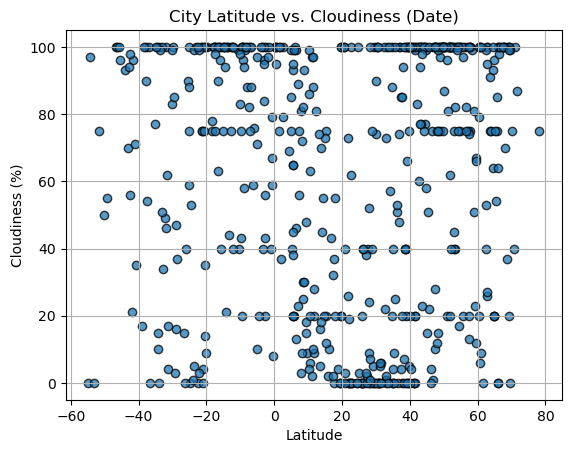

In [59]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = [city["Cloudiness"] for city in city_data]

plt.scatter(latitudes, cloudiness, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

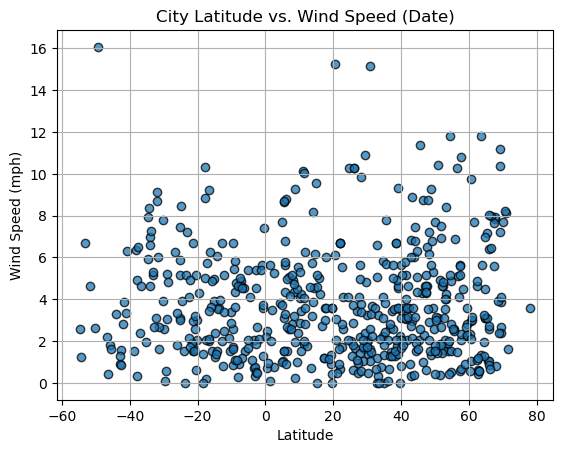

In [60]:
# Build the scatter plots for latitude vs. wind speed
wind_speeds = [city["Wind Speed"] for city in city_data]
plt.scatter(latitudes, wind_speeds, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Save the figure
plt.savefig("output_data/Fig4.png")
plt.grid(True)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Create regression line
    regression_line = slope * x_values + intercept



In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame([city for city in city_data if city["Lat"] >= 0])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kili,5.6439,169.1211,28.44,74,93,8.64,MH,1704295448
1,nemuro,43.3236,145.5750,-1.99,68,100,2.97,JP,1704295448
2,iqaluit,63.7506,-68.5145,-19.15,71,75,11.83,CA,1704295232
3,qaqortoq,60.7167,-46.0333,-4.96,78,100,2.97,GL,1704295448
4,zaragoza,41.6561,-0.8773,18.60,82,20,2.06,ES,1704295117


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame([city for city in city_data if city["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,villa yapacani,-17.4000,-63.8333,29.47,69,100,0.21,BO,1704295448
1,broken hill,-31.9500,141.4333,26.09,49,100,9.15,AU,1704295216
2,blackmans bay,-43.0167,147.3167,14.07,77,70,0.89,AU,1704295448
3,mount gambier,-37.8333,140.7667,15.67,87,100,4.92,AU,1704295449
4,ushuaia,-54.8000,-68.3000,15.79,66,0,2.57,AR,1704295448


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7321471127983962


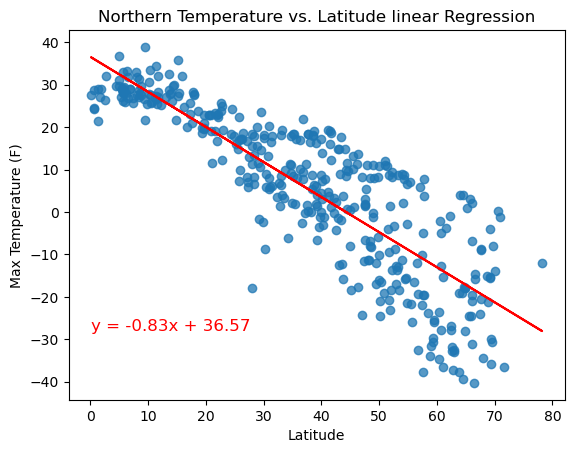

In [70]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern_temperature = northern_hemi_df["Max Temp"]
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_northern, y_values_northern_temperature)
regression_line = slope * x_values_northern + intercept

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern_temperature, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_northern, regression_line, "r")



# Incorporate the other graph properties
plt.text(x_values_northern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Northern Temperature vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.38301213973401693


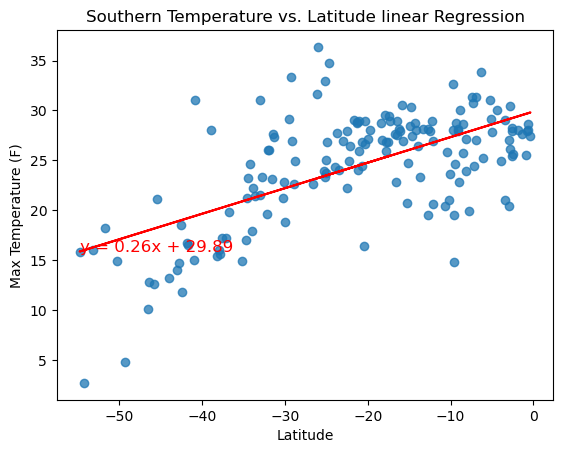

In [73]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern_temperature = southern_hemi_df["Max Temp"]
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_southern, y_values_southern_temperature)
regression_line = slope * x_values_southern + intercept

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern_temperature, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_southern, regression_line, "r")

# Incorporate the other graph properties
plt.text(x_values_southern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Southern Temperature vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20041755530728445


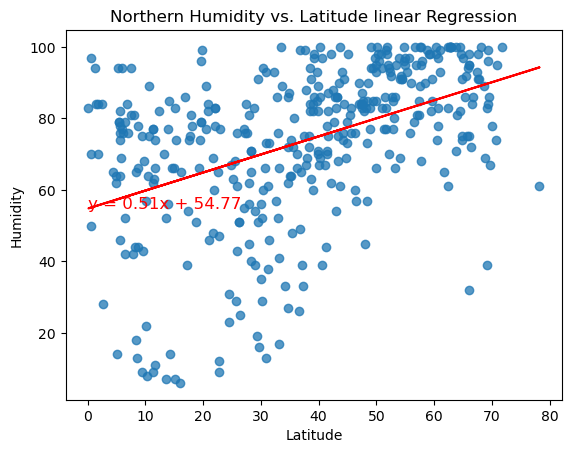

In [74]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern_humidity = northern_hemi_df["Humidity"]
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_northern, y_values_northern_humidity)
regression_line = slope * x_values_northern + intercept

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern_humidity, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_northern, regression_line, "r")

# Incorporate the other graph properties
plt.text(x_values_northern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Northern Humidity vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.029100569488350287


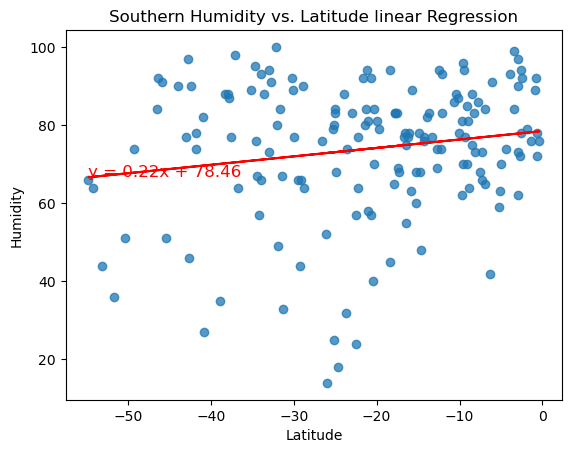

In [77]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern_temperature = southern_hemi_df["Humidity"]
# Perform Linear regression on Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_southern, y_values_southern_temperature)
regression_line = slope * x_values_southern + intercept

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern_temperature, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_southern, regression_line, "r")

# Plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern_temperature, "Latitude", "Max Temperature (F)", "Southern Hemisphere - Temperature vs. Latitude", (0, -20))

# Incorporate the other graph properties
plt.text(x_values_southern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Southern Humidity vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06864302831142934


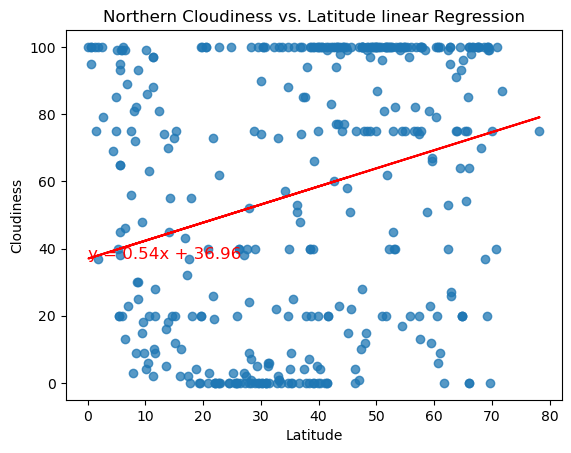

In [78]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern_cloudiness = northern_hemi_df["Cloudiness"]
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_northern, y_values_northern_cloudiness)
regression_line = slope * x_values_northern + intercept

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern_cloudiness, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_northern, regression_line, "r")

# Incorporate the other graph properties
plt.text(x_values_northern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Northern Cloudiness vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.02618941814145929


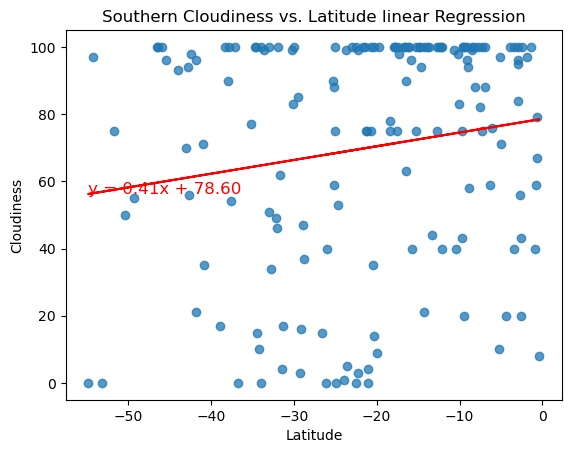

In [80]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern_cloudiness = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_southern, y_values_southern_cloudiness)
regression_line = slope * x_values_southern + intercept

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern_cloudiness, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_southern, regression_line, "r")

# Plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern_cloudiness, "Latitude", "Cloudiness", "Southern Hemisphere - Cloudiness vs. Latitude", (0, -20))

# Incorporate the other graph properties
plt.text(x_values_southern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Southern Cloudiness vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003348744858287422


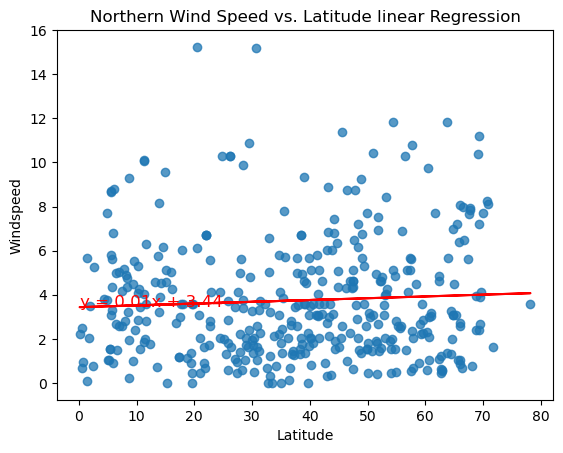

In [87]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern_windspeed = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_northern, y_values_northern_windspeed)
regression_line = slope * x_values_northern + intercept

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern_windspeed, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_northern, regression_line, "r")



# Incorporate the other graph properties
plt.text(x_values_northern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Northern Wind Speed vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.023191568001071246


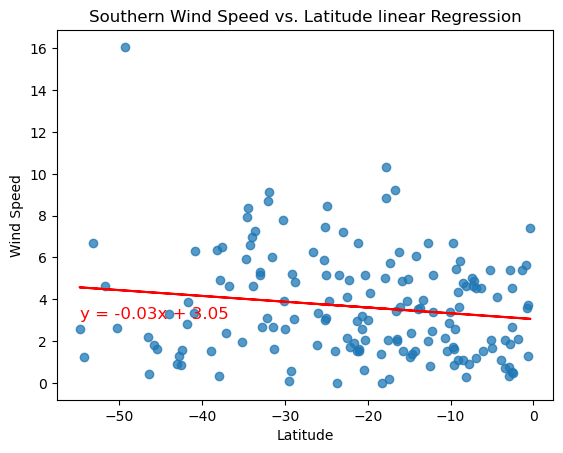

In [88]:
# Southern Hemisphere
# YOUR CODE HERE
x_values_southern = southern_hemi_df["Lat"]
y_values_southern_windspeed = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_southern, y_values_southern_windspeed)
regression_line = slope * x_values_southern + intercept

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern_windspeed, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_southern, regression_line, "r")

# Plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern_windspeed, "Latitude", "Wind Speed", "Southern Hemisphere - Wind Speed vs. Latitude", (0, -20))

# Incorporate the other graph properties
plt.text(x_values_southern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Southern Wind Speed vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE